In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import EngFormatter

import seaborn as sns

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.options.display.max_columns = 99

import numpy as np

In [2]:
male_c = '#67A3D9'
feml_c = '#F8B7CD'

# Contador de imagenes
j = 0

In [3]:
frac = 0.05
df = pd.read_csv('./../data/results/RFReg_'+str(frac)+'ARG2020-03-31.csv')
# df2 = pd.read_csv('./../data/results/RFReg_0.01ARG2020-06-30.csv')


# # Columnas de ingresos. Estan en escala log
# from numpy import power
# columnas_pesos = [u'P21', u'P47T', u'PP08D1', u'TOT_P12', u'T_VI', u'V12_M', u'V2_M', u'V3_M', u'V5_M']
# df[columnas_pesos] = power(10, df[columnas_pesos]) - 1

# Editar columnas
df['P10'] = 2 - df['P10']
df['P09'] = df.P09.replace(5, 4) #Polimodal tomado como secundario 

df['P0910'] = df.P09.astype(str) + df.P10.astype(str)

P0910_label = pd.read_csv('./../data/info/P0910_labels.csv', dtype = str)

In [4]:
len(df)/frac

44630820.0

In [5]:
#### Ejemplos

## Distribuciones de ingresos, segun nivel educativo y genero

In [6]:
data = df.loc[df.P03 >=24][['P0910', 'P47T', 'P02']]
data['P47T'] = np.power(10, data['P47T']) - 1
data = data.merge(P0910_label)

data = data.loc[~data.P0910.isin(['30', '31'])] # Quitamos EGB

# data = df.loc[df.P06 > 0 ] # extranjeros

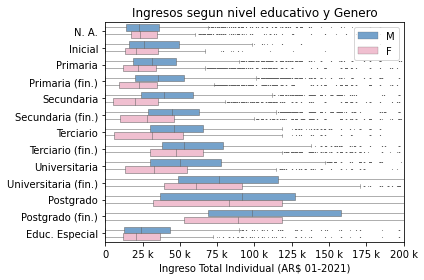

In [7]:

ax = sns.boxplot(y="P0910_label", x="P47T", hue="P02",
                 data=data.sort_values('P0910'), linewidth=.5, palette = {1: male_c, 2: feml_c}, fliersize=.2, orient = 'h')

handles, _ = ax.get_legend_handles_labels() # Get the artists.
ax.legend(handles, ["M", "F"], loc="upper right")

ax.set_title('Ingresos segun nivel educativo y Genero')
ax.set_xlim(0, 2e5)

ax.set_xlabel('Ingreso Total Individual (AR$ 01-2021)')
ax.set_ylabel('')

ax.xaxis.set_major_formatter(EngFormatter())

plt.tight_layout(); plt.savefig('./../figuras/plot_'+str(j)+'.png'); j += 1
plt.show()

## Region y genero

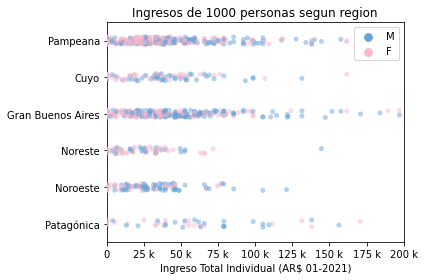

In [8]:
data = df.loc[df.P03 >=24][['Region', 'P47T', 'P02','CONDACT']]
data['P47T'] = np.power(10, data['P47T']) - 1

ax = sns.stripplot(y="Region", x="P47T", hue="P02",
                 data=data.sample(1000), linewidth=0, palette = {1: male_c, 2: feml_c}, orient = 'h', alpha = .5)

handles, _ = ax.get_legend_handles_labels() # Get the artists.
ax.legend(handles, ["M", "F"], loc="upper right")

ax.set_xlim(0, 2e5)
ax.set_title('Ingresos de 1000 personas segun region')

ax.set_xlabel('Ingreso Total Individual (AR$ 01-2021)')
ax.set_ylabel('')

ax.xaxis.set_major_formatter(EngFormatter())
plt.tight_layout(); plt.savefig('./../figuras/plot_'+str(j)+'.png'); j += 1
plt.show()

## Por condicion de actividad

In [9]:
pd.options.display.max_rows = 999

In [10]:
data = df.loc[df.P03 >=24][['Region', 'P47T', 'P02','CONDACT', 'CAT_INAC', 'CAT_OCUP']]
data['P47T'] = np.power(10, data['P47T']) - 1

data['ESTADO'] = data.CONDACT.astype(str) + data.CAT_INAC.astype(str) + data.CAT_OCUP.astype(str)
EST_labels = pd.read_csv('./../data/info/ESTADO_labels.csv', ';', dtype=str)
data = data.merge(EST_labels, how = 'left')

estados_ppales = data.ESTADO_label.value_counts().head(10).index.values
data = data.loc[data.ESTADO_label.isin(estados_ppales)]

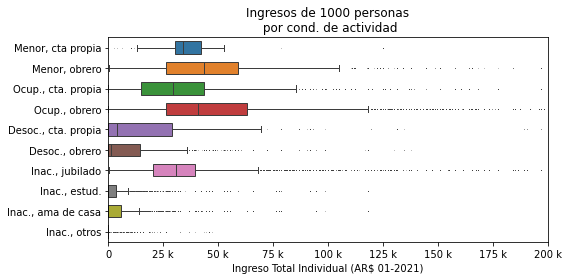

In [11]:
fig, ax = plt.subplots(1, figsize = (8, 4) )
# ax = sns.violinplot(y="ESTADO_label", x="P47T",
#                  data=data.sort_values('ESTADO'), linewidth=0, orient = 'h', alpha = .5, scale = 'count', bw = .2, saturation = .5)

ax = sns.boxplot(y="ESTADO_label", x="P47T",
                 data=data.sort_values('ESTADO'), linewidth=1, orient = 'h', fliersize = .1, width = .6)

ax.set_xlim(0, 2e5)
ax.set_title('Ingresos de 1000 personas\n por cond. de actividad')

ax.set_xlabel('Ingreso Total Individual (AR$ 01-2021)')
ax.set_ylabel('')

ax.xaxis.set_major_formatter(EngFormatter())
plt.tight_layout(); plt.savefig('./../figuras/plot_'+str(j)+'.png'); j += 1
plt.show()

In [12]:
# df['grupo'] = pd.cut(df.P03, np.arange(0, 100, 6))

# x = df.groupby(['grupo', 'CONDACT','CAT_INAC', 'CAT_OCUP']).size().unstack(0)
# (100*(x.loc[x.sum(1) > 5]/x.sum(0)).round(2)).astype(int)

# x = df.groupby(['grupo', 'CONDACT']).size().unstack(0)
# (100*(x.loc[x.sum(1) > 5]/x.sum(0)).round(2)).astype(int)

### Por aglomerado

In [13]:
aglo_labels = pd.read_csv('./../data/info/aglo_labels.csv')

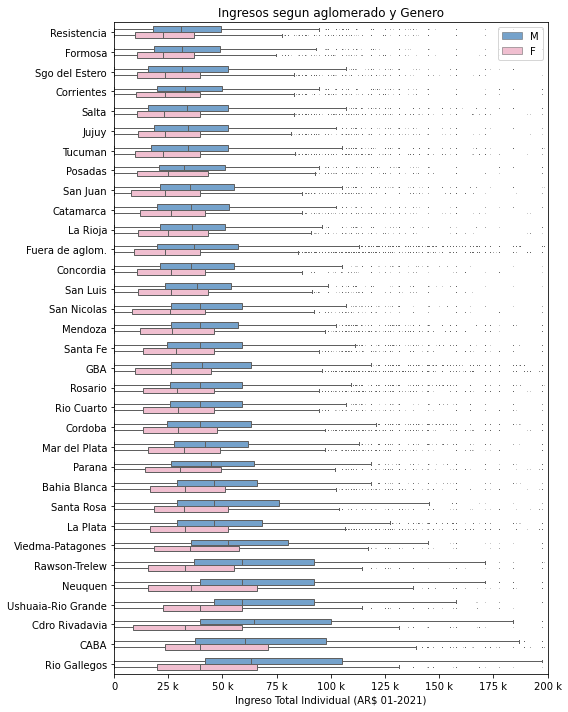

In [14]:
data = df.loc[(df.P03 >=24) & (df.CONDACT != 0)][['Region', 'P47T', 'P02','CONDACT', 'AGLOMERADO', 'AGLO_rk']].merge(aglo_labels)
data['P47T'] = np.power(10, data['P47T']) - 1
order = data.groupby('NOMAGLO')['P47T'].mean().sort_values().index.values

fig, ax = plt.subplots(1, figsize = (8, 10))
ax = sns.boxplot(y="NOMAGLO", x="P47T", hue="P02",
                 data=data, linewidth=1, orient = 'h', fliersize = .1, width = .6, order = order, palette = {1: male_c, 2: feml_c})

handles, _ = ax.get_legend_handles_labels() # Get the artists.
ax.legend(handles, ["M", "F"], loc="upper right")

ax.set_title('Ingresos segun aglomerado y Genero')
ax.set_xlim(0, 2e5)

ax.set_xlabel('Ingreso Total Individual (AR$ 01-2021)')
ax.set_ylabel('')

ax.xaxis.set_major_formatter(EngFormatter())
plt.tight_layout(); plt.savefig('./../figuras/plot_'+str(j)+'.png'); j += 1
plt.show()

In [15]:
# data = df.loc[df.P03 >=24][['Region', 'P47T', 'P02','CONDACT', 'AGLOMERADO', 'AGLO_rk']].merge(aglo_labels)
# data['P47T'] = np.power(10, data['P47T']) - 1

# fig, ax = plt.subplots(1, figsize = (6, 24))
# # ax = sns.boxplot(y="AGLO_rk", x="P47T", hue="P02",
# #                  data=data.sample(10000), linewidth=1, orient = 'h')
# ax = sns.violinplot(x="P47T", y="AGLO_rk", hue="P02", orient = 'h',
#                     data=data, palette="Set2", split=True,
#                     scale="count", inner="quartile")
# ax.set_xlim(0, 1e5)



## Actividad

In [16]:
data = df.loc[df.P03 >=14][['Region', 'P47T', 'P02','CONDACT', 'AGLOMERADO']].merge(aglo_labels)
data['P47T'] = np.power(10, data['P47T']) - 1



In [17]:
x = data.CONDACT.value_counts()

# Población económicamente activa:	
# 	La integran las personas que tienen una ocupación o que sin tenerla la están buscando activamente. Está compuesta por la población ocupada más la población desocupada.
data['PEA'] = (data.CONDACT == 1) | (data.CONDACT == 2)

# Población desocupada:	
# 	Se refiere a personas que, no teniendo ocupación, están buscando activamente trabajo. Corresponde a Desocupación Abierta. 
#     Este concepto no incluye otras formas de precariedad laboral (también relevadas por la EPH) tales como personas que realizan trabajos transitorios mientras buscan activamente una ocupación, 
#     aquellas que trabajan jornadas involuntariamente por debajo de lo normal, a los desocupados que han suspendido la búsqueda por falta de oportunidades visibles de empleo,...
    

# Población subocupada visible:	
# 	Se refiere a los ocupados que trabajan menos de 35 horas semanales por causas involuntarias y desean trabajar más horas. 
    
# Tasa de actividad:	
# 	Calculada como porcentaje entre la población económicamente activa y la población total.
print(data['PEA'].sum()/len(data))

# Tasa de empleo:	
# 	Calculada como porcentaje entre la población ocupada y la población total.
print((data.CONDACT == 1).sum()/len(data))
    
# Tasa de desocupación:	
# 	Calculada como porcentaje entre la población desocupada y la población económicamente activa.
print((data.CONDACT == 2).sum()/data['PEA'].sum())

0.6475864004561188
0.6090728348622612
0.05947247435513034


In [18]:
# (100*x/x.sum()).sort_index() # N.A., Ocup, desoc, inac,

In [19]:
x = data.groupby(['NOMAGLO', 'CONDACT']).size().unstack()
100*x.div(x.sum(1), 0).round(3).fillna(0)#.astype(int)

CONDACT,0,1,2,3
NOMAGLO,,,,
Bahia Blanca,2.8,60.0,3.9,33.4
CABA,2.1,67.8,3.0,27.1
Catamarca,0.5,62.1,4.9,32.5
Cdro Rivadavia,0.4,65.3,3.6,30.8
Concordia,0.7,62.4,3.0,33.8
Cordoba,1.7,62.0,4.6,31.7
Corrientes,0.8,58.8,4.4,36.0
Formosa,0.4,58.9,3.2,37.5
Fuera de aglom.,1.6,56.6,3.1,38.7


## Deciles y genero

In [20]:
data = df.loc[df.P03 >=24]

q = 10
data['P47T_q'] = pd.qcut(data['P47T'], q, labels=range(1, q + 1))

deciles = data.groupby(['P02', 'P47T_q']).size().unstack()
deciles = 100*deciles / deciles.sum()
deciles = deciles.T

<ipython-input-20-f7cef1cf4868>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['P47T_q'] = pd.qcut(data['P47T'], q, labels=range(1, q + 1))


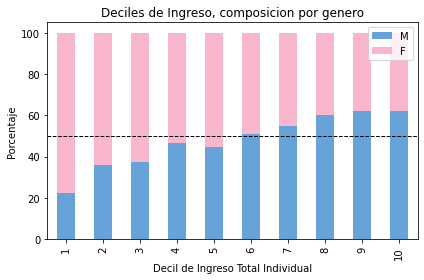

In [21]:
fig, ax = plt.subplots(1)

deciles.plot(kind = 'bar', color = [male_c, feml_c], ax = ax, stacked = True)

handles, _ = ax.get_legend_handles_labels() # Get the artists.
ax.legend(handles, ["M", "F"])

ax.set_title('Deciles de Ingreso, composicion por genero')

ax.set_xlabel('Decil de Ingreso Total Individual')
ax.set_ylabel('Porcentaje')
ax.axhline(50, c = 'k', lw = 1, linestyle = '--')

plt.tight_layout(); plt.savefig('./../figuras/plot_'+str(j)+'.png'); j += 1

plt.show()

## Deciles y partido

In [22]:
import geopandas as gpd

## Shapefiles de provincias
ref_provs = gpd.read_file('./../../IGN_INDEC_georef/IGN_shp/Provincia/')

### Shapefiles de Fracciones censales y departamentos
frac_gdf = gpd.read_file('./../../IGN_INDEC_georef/censos_shp_CONICET_dissolved/fracs_2010.shp')
dptos_gdf = gpd.read_file('./../../IGN_INDEC_georef/censos_shp_CONICET_dissolved/dptos_2010.shp')

# frac_gdf['personas'] = pd.to_numeric(frac_gdf['personas'])
# dptos_gdf['personas'] = pd.to_numeric(dptos_gdf['personas'])

fancy_crs = {u'lat_0': -35,
 u'lon_0': -65,
 u'no_defs': True,
 u'proj': u'ortho',
 u'units': u'm',
 u'x_0': -65,
 u'y_0': -35,
 u'a' : 6371000}

In [23]:
radios_info = pd.read_csv('./../data/info/radio_ref.csv')

In [24]:
radios_info.tail()

,RADIO_REF_ID,FRAC_REF_ID,IDRADIO,DPTO_REF_ID,IDFRAC,PROV_REF_ID,IDDPTO,DPTO,NOMDPTO,CPV2010_REF_ID,IDPROV,PROV,NOMPROV,radio,AGLOMERADO
52376,52376,5426,9,525,8,24,14,94014,Ushuaia,1,94,94,Tierra del Fuego,940140809,31
52377,52377,5426,10,525,8,24,14,94014,Ushuaia,1,94,94,Tierra del Fuego,940140810,31
52378,52378,5426,11,525,8,24,14,94014,Ushuaia,1,94,94,Tierra del Fuego,940140811,31
52379,52379,5426,12,525,8,24,14,94014,Ushuaia,1,94,94,Tierra del Fuego,940140812,31
52380,52380,5426,13,525,8,24,14,94014,Ushuaia,1,94,94,Tierra del Fuego,940140813,31


In [ ]:
data = df.loc[df.P03 >=24][['RADIO_REF_ID', 'AGLOMERADO', 'P47T']]
# data['rank'] = data.P47T.rank(pct = True)
data['P47T'] = np.power(10, data['P47T']) - 1


# data[['P47T', 'rank']].sample(50).sort_values('rank') 
# Alto rank == alto salario
data = data.merge(radios_info[['RADIO_REF_ID', 'DPTO', 'NOMDPTO', 'PROV', 'IDFRAC']])
data['PROV_'] = data.PROV.astype(str).str.zfill(2)
data['DEPTO_'] = data.DPTO.astype(str).str.zfill(5).str[2:]
data['FRACC_'] = data.IDFRAC.astype(str).str.zfill(2)

data = data.loc[data.AGLOMERADO.isin([32, 33])]
data = data[['DEPTO_','NOMDPTO', 'PROV_','AGLOMERADO', 'FRACC_','P47T']]
data.head()

In [ ]:
data = data.groupby(['PROV_', 'DEPTO_', 'FRACC_'])['P47T'].describe()[['mean', '50%']].reset_index()

In [ ]:
crs = {'init': 'epsg:3395'}

gdf = gpd.GeoDataFrame(data.merge(frac_gdf, on = ['PROV_', 'DEPTO_', 'FRACC_'], how = 'left'))

gdf = gdf.to_crs(crs)

fig, ax = plt.subplots(1, figsize = (10, 10))

# # Encuadre GBA
if crs == {'init': 'epsg:3395'}:
    ax.set_xlim(-6560000, -6460000)
    ax.set_ylim(-4130000, -4040000)
elif crs == fancy_crs:
    ax.set_xlim(-.75e6, 1.25e6)
    ax.set_ylim(-2.3e6, 1.6e6)
    
gdf.plot(column = '50%', ax = ax, vmin = 10000, vmax = 55000, cmap = 'RdYlGn', edgecolor = 'None', lw = 0)
ref_provs.to_crs(crs).plot(ax = ax, color = 'None', edgecolor = 'k', lw = 1)

# ejido = gpd.read_file('./../../Documents/censo_geo/ejidos/ejido_BA', driver='GeoJSON')
# ejido.loc[[1]].to_crs({'init': 'epsg:3395'}).plot(color = 'w', ax = ax)

ax.axis('off')
plt.tight_layout(); plt.savefig('./../figuras/plot_'+str(j)+'.png'); j += 1
plt.show()

In [ ]:
data = df.loc[df.P03 >=24][['RADIO_REF_ID', 'AGLOMERADO', 'P47T']]
data['rank'] = data.P47T.rank(pct = True)

data = data.merge(radios_info[['RADIO_REF_ID', 'PROV', 'NOMPROV']])
data['PROV_P47T_q'] = data.groupby(['PROV', 'NOMPROV'])['P47T'].rank(pct = True)
data['PROV_dist_median'] = abs(data['PROV_P47T_q'] - .5)

data = data.groupby(['PROV', 'NOMPROV']).apply(lambda x: x.nsmallest(1, 'PROV_dist_median'))
data = data.reset_index(drop = True).drop(['RADIO_REF_ID', 'AGLOMERADO', 'PROV_P47T_q','PROV_dist_median'], axis = 1)

data['P47T'] = np.power(10, data['P47T']) - 1
data['PROV'] = data['PROV'].astype(str).str.zfill(2)

data.sort_values('rank')

In [ ]:
# ref_provs

In [ ]:
crs = fancy_crs

gdf = gpd.GeoDataFrame(data.merge(ref_provs[['IN1', 'geometry']], left_on = 'PROV', right_on = 'IN1'))
gdf = gdf.to_crs(crs)

fig, ax = plt.subplots(1, figsize = (8, 14))

# # Encuadre ARG
if crs == {'init': 'epsg:3395'}:
    ax.set_xlim(-8300000, -5750000)
    ax.set_ylim(-7450000, -2400000)
elif crs == fancy_crs:
    ax.set_xlim(-.75e6, 1.25e6)
    ax.set_ylim(-2.3e6, 1.6e6)

# Carteles
for i, row in gdf.loc[~gdf.PROV.isin(['90', '94'])].iterrows(): # Sacamos esta provs para que no se superpongan los cartelitos
    x = row.geometry.centroid.x
    y = row.geometry.centroid.y
    
#     ingreso_mediano = '$'+str(int(myround(row.P47T_persona,500)))
    ingreso_mediano = '$'+str(int(round(row.P47T, -2)))
    rank = str(int(round(100*row['rank'])))+'%'

    ax.text(x, y + 40000, rank, fontsize=10, color = '.1', horizontalalignment = 'center')
    ax.text(x, y - 25000, ingreso_mediano, fontsize=11, color = '.1', horizontalalignment = 'center')
    
gdf.plot(column = 'P47T', ax = ax, vmin = 10000, vmax = 55000, cmap = 'RdYlGn', edgecolor = '.7', lw = 0)
ax.axis('off')
plt.tight_layout(); plt.savefig('./../figuras/plot_'+str(j)+'.png'); j += 1
plt.show()

## Extranjeros, formalidad

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# 'PP07J', #turno habitual
#  'PP07G_59', # Beneficios Od ppal ninguno
#  'PP07I', # Beneficios Od ppal Aporta jub por sí mismo 
#  'PP07G1', #Beneficios Od ppal vacaciones pagas

In [ ]:
data = df.loc[(df.P03 >=24) & (df.CONDACT == 1)]
data['extranjero'] = data['P06'] != 0
data['PP07G_59'] = data['PP07G_59']/5.

data['P47T'] = np.power(10, data['P47T']) - 1

data = data.merge(P0910_label)
data = data.loc[~data.P0910.isin(['30', '31'])] # Quitamos EGB

In [ ]:
## Color para extranjero
ARG_color = male_c
ext_color = '#0C71E0'

In [ ]:
ax = sns.boxplot(y="P0910_label", x="P47T", hue="extranjero",
                 data=data.sort_values('P0910'), linewidth=.5, palette = {False: male_c, True: ext_color}, fliersize=.2, orient = 'h')

handles, _ = ax.get_legend_handles_labels() # Get the artists.
ax.legend(handles, ["Argentino", "Extranjero"], loc="upper right")

ax.set_title('Ingresos segun nivel educativo y nacionalidad')
ax.set_xlim(0, 2e5)

ax.set_xlabel('Ingreso Total Individual (AR$ 01-2021)')
ax.set_ylabel('')

ax.xaxis.set_major_formatter(EngFormatter())
plt.tight_layout(); plt.savefig('./../figuras/plot_'+str(j)+'.png'); j += 1
plt.show()

### Edad y genero

In [ ]:
data = df
data['P47T'] = np.power(10, data['P47T']) - 1

bns = np.arange(17, 81, 3)
# data['Grupo_Edad'] = pd.cut(data.P03, bins = bns, labels=(bns[:-1] + bns[1:])/2) # 
data['Grupo_Edad'] = pd.cut(data.P03, bins = bns) # 
data = data.loc[data.Grupo_Edad.notna()]

# data['extranjero'] = data['P06'] != 0
# data['PP07G_59'] = data['PP07G_59']/5.

# data['Edad'] = data.groupby('Grupo_Edad')['P03'].transform(np.mean)

In [ ]:
import matplotlib

In [ ]:
ax = sns.catplot(kind = 'box', y="P47T", x="Grupo_Edad", hue="P02", data = data, 
                  height = 5, aspect = 2, width = .5, fliersize = .2, palette = {1: male_c, 2: feml_c}, linewidth= .3, legend=False)
ax.set_xticklabels(rotation=30)
ax.set(ylim=(0, 1e5))
ax.set(ylabel='Ingreso Total Individual')
ax.set(xlabel='Grupo Etario')

name_to_color = {'M':   male_c, 'F':   feml_c}
patches = [matplotlib.patches.Patch(color=v, label=k) for k,v in name_to_color.items()]
plt.legend(handles=patches, loc = 'upper right')

plt.tight_layout(); plt.savefig('./../figuras/plot_'+str(j)+'.png'); j += 1
plt.show()

In [ ]:
# data = data.groupby(['P02', 'Grupo_Edad'])['P47T'].describe()
# fig, ax = plt.subplots(1, figsize = (12, 5))
# ax.fill_between(x = bns[:-1], y1 = data.loc[1]['25%'], y2 = data.loc[1]['75%'], color = male_c, alpha = .5)
# ax.scatter(x = bns[:-1], y = data.loc[1]['50%'], color = male_c)
# ax.fill_between(x = bns[:-1], y1 = data.loc[2]['25%'], y2 = data.loc[2]['75%'], color = feml_c, alpha = .5)
# ax.scatter(x = bns[:-1], y = data.loc[2]['50%'], color = feml_c)


## Insersion laboral de jovenes

In [ ]:
data = df.loc[(df.P03 >= 18) & (df.P03 <= 30)][['P02', 'P03', 'CONDACT', 'CAT_INAC', 'INGRESO', 'P47T']]
data['P47T'] = np.power(10, data['P47T']) - 1

In [ ]:
x = data.groupby(['CONDACT', 'P03']).size().unstack()
(x/x.sum()).T.plot()

In [ ]:
fig, ax = plt.subplots(1,)

x = data.loc[data.P02 == 1].groupby(['CONDACT', 'P03']).size().unstack()
(x/x.sum()).T.plot(ax = ax, color = male_c)

x = data.loc[data.P02 == 2].groupby(['CONDACT', 'P03']).size().unstack()
(x/x.sum()).T.plot(ax = ax, color = feml_c)

In [ ]:
fig, ax = plt.subplots(1,)

x = data.loc[data.P02 == 1].groupby(['CAT_INAC', 'P03']).size().unstack()
(x/x.sum()).T.plot(ax = ax, color = male_c)

x = data.loc[data.P02 == 2].groupby(['CAT_INAC', 'P03']).size().unstack()
(x/x.sum()).T.plot(ax = ax, color = feml_c)

In [ ]:
fig, ax = plt.subplots(1,)

x = data.loc[data.P02 == 1].groupby(['INGRESO', 'P03']).size().unstack()
(x/x.sum()).T.plot(ax = ax, color = male_c)

x = data.loc[data.P02 == 2].groupby(['INGRESO', 'P03']).size().unstack()
(x/x.sum()).T.plot(ax = ax, color = feml_c)

In [ ]:
x = data.loc[data.INGRESO == True].groupby(['P02', 'P03'])['P47T'].describe()

fig, ax = plt.subplots(1, figsize = (12, 5))

ax.fill_between(x = x.loc[1].index, y1 = x.loc[1]['25%'], y2 = x.loc[1]['75%'], color = male_c, alpha = .5)
ax.scatter(x = x.loc[1].index, y = x.loc[1]['50%'], color = male_c)

ax.fill_between(x = x.loc[2].index, y1 = x.loc[2]['25%'], y2 = x.loc[2]['75%'], color = feml_c, alpha = .5)
ax.scatter(x = x.loc[2].index, y = x.loc[2]['50%'], color = feml_c)

plt.show()

### Principales inmigrantes

In [ ]:
# paises = pd.read_csv('./../data/info/paises_indec.csv').dropna()
# paises['P06'] = paises['COD_INDEC'].astype(int)

# paises.to_csv('./../data/info/paises_indec_2.csv', index = False)

paises = pd.read_csv('./../data/info/paises_indec_3.csv').dropna()


In [ ]:
data = df.merge(paises[['P06', 'NOMBRE CORTO']], how = 'left')
data['NOMBRE CORTO'] = data['NOMBRE CORTO'].fillna('Argentinos')
populares = data['NOMBRE CORTO'].value_counts().head(12)

data = data.loc[(data['NOMBRE CORTO'].isin(populares.index)) & (data.CONDACT == 1)]
# data['P47T'] = np.power(10, data['P47T']) - 1

In [ ]:
order = data.groupby('NOMBRE CORTO').P47T.median().sort_values().index

In [ ]:
cmap = sns.color_palette("coolwarm", as_cmap=True)

In [ ]:
fig, ax = plt.subplots(1, figsize = (8, 6))
ax = sns.boxplot(y="NOMBRE CORTO", x="P47T", hue="P02",
                 data=data, linewidth=1, orient = 'h', order=order, fliersize = .2, palette = {1: male_c, 2: feml_c})
ax.set_xlim(0, 2e5)
ax.set_title('Ingresos por Nacionalidad')
ax.set_ylabel('')
ax.set_xlabel('Ingreso Total Individual')

handles, _ = ax.get_legend_handles_labels() # Get the artists.
ax.legend(handles, ["M", "F"], loc="upper right")

plt.tight_layout(); plt.savefig('./../figuras/plot_'+str(j)+'.png'); j += 1
plt.show()